### Install Python 3.10.8 because Colab is a boomer

In [1]:
!python --version

Python 3.10.8


### Install and import a bunch of libraries and modules

<html>
<ol>
<li>PyTorch and submodules (Python machine learning library)</li>
<li>PyTorch Geometric (machine learning library for graph-based learning)</li>
<li>Matplotlib (drawing and plotting library)</li>
<li>NetworkX (Python data science/network/graph library)</li>
</ol>

In [2]:
import torch
import torch.nn as nn
from torch_geometric import *

In [3]:
from torch_geometric.datasets import QM9, ZINC, MoleculeNet

In [4]:
from torch_geometric.data import *

In [5]:
from torch_geometric.utils.convert import to_networkx

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
from torch_geometric.transforms import NormalizeFeatures

In [8]:
import scipy
import scipy.io

### The QM9 Dataset
Loads the QM9 Dataset -- a datset with 134K organic molecules -- from the PyTorch Geometric `datasets` submodule.  
This dataset contains all the molecules represented in a graphical format, where atoms are vertices and edges are bonds between atoms.

Problem: cannot download the QM9 dataset it seems, everything else is working perfectly

In [9]:
dataset = QM9('', transform=None, pre_transform=None, pre_filter=None)

⬇️ Function that gets information about a molecule from the dataset

In [10]:
def get_info(idx: int):
    data = dataset[idx]
    print(f'Number of nodes: {data.num_nodes}')
    print(f'Number of edges: {data.num_edges}')
    print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
    print(f'Has isolated nodes: {data.has_isolated_nodes()}')
    print(f'Has self-loops: {data.has_self_loops()}')
    print(f'Is undirected: {data.is_undirected()}')
    return data

⬇️ Function that prints the data associated with the molecule

In [11]:
def mol_info(data):
    for prop in data: print(prop)

⬇️ Function that draws the graphical representation of the molecule

In [12]:
def draw_mol(data):
    vis = to_networkx(data)
    plt.figure(1, figsize=(8,8))
    nx.draw(vis)
    plt.show()

Create a **Dataset Loader** class for O.O.P purposes

In [13]:
class DatasetLoader:
    def __init__(self):
        self.dataset = dataset
        self.name = "Dataset Loader"

    def get_info(self, idx: int):
        data = self.dataset[idx]
        print(f'Number of nodes: {data.num_nodes}')
        print(f'Number of edges: {data.num_edges}')
        print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
        print(f'Has isolated nodes: {data.has_isolated_nodes()}')
        print(f'Has self-loops: {data.has_self_loops()}')
        print(f'Is undirected: {data.is_undirected()}')
        
    def mol_info(self, data):
        for prop in data: print(prop)

    def draw_mol(self, data):
        vis = to_networkx(data)
        plt.figure(1, figsize=(8,8))
        nx.draw(vis)
        plt.show()

    def __len__(self) -> int:
        return len(self.dataset) #13081

    def __getitem__(self, idx, verbose=False, draw=False):
        if verbose:
            self.get_info(idx)
            print()
        data = self.dataset[idx]
        self.mol_info(data)
        if draw:
            print()
            self.draw_mol(data)
        return data

In [14]:
DL = DatasetLoader()

('x', tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))
('edge_index', tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]]))
('edge_attr', tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]))
('y', tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]]))
('pos', tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,

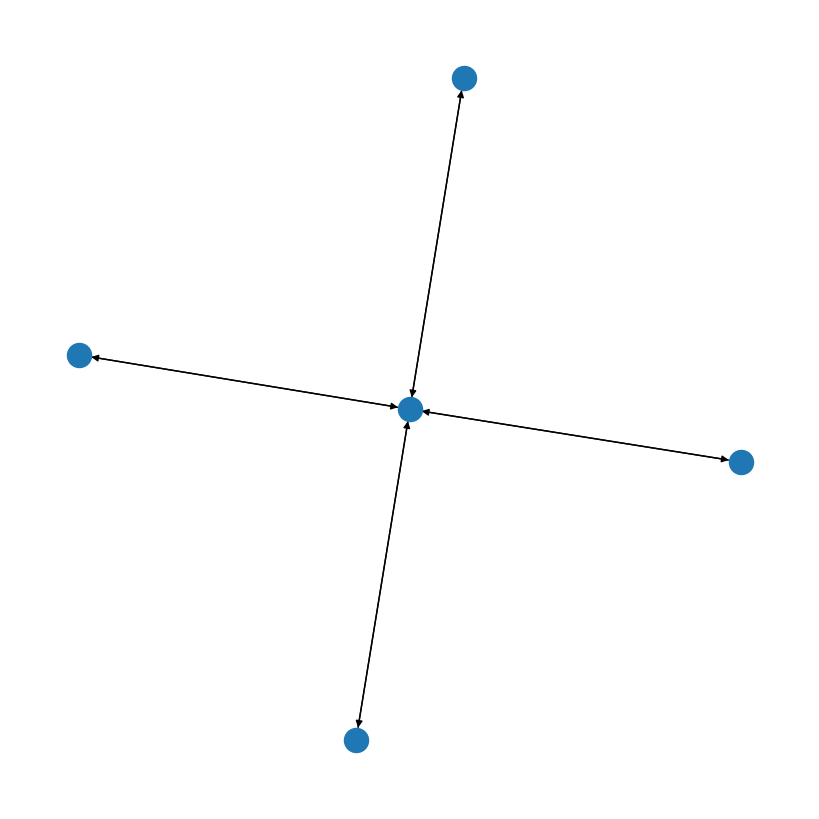

Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], z=[5], name='gdb_1', idx=[1])

In [15]:
DL.__getitem__(0, verbose=False, draw=True)

### Get the NetGAN model

Clone the repository; using original NetGAN

Better way to access models:

In [16]:
import sys
sys.path.insert(1, 'netgan_pytorch/netgan')

In [17]:
from models import *

In [18]:
from utils import *

In [19]:
from training import *

### Convert PyG data to Scipy Sparse Matrix

In [20]:
def pyg_to_ssm(idx: int, v: bool=False, d: bool=False):
    sample = DL.__getitem__(idx, verbose=v, draw=d)
    sample = to_networkx(sample)
    sample_mat = nx.to_scipy_sparse_matrix(sample)
    return sample, sample_mat

In [34]:
not_ch4, not_methane = pyg_to_ssm(19147)

('x', tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 3.],
        [0., 0., 0., 1., 0., 8., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 2.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 2.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 2.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0

/var/folders/60/yjm0dhb14rx345qp3gt455mw0000gn/T/ipykernel_8553/3298640954.py:4: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  sample_mat = nx.to_scipy_sparse_matrix(sample)


In [35]:
print(not_ch4)

DiGraph with 20 nodes and 42 edges


### Now, let's try running NetGAN on a very small sample of the QM9 Dataset

In [36]:
import io

In [37]:
graph = nx.to_numpy_array(not_ch4)

In [38]:
graph[graph!=0] = 1.0
graph_nx = nx.from_numpy_array(graph)
graph_sparse = scipy.sparse.csr_matrix(graph)
n_edges = graph.sum()

In [39]:
print(f"This graph has {n_edges} edges!")

This graph has 42.0 edges!


In [40]:
graph_sparse

<20x20 sparse matrix of type '<class 'numpy.float64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [41]:
not_graph_sparse = scipy.sparse.tril(graph_sparse).tocsr()

In [42]:
mst = scipy.sparse.csgraph.minimum_spanning_tree(not_graph_sparse)

In [43]:
mst[mst > 1] = 1
mst.eliminate_zeros()
ihatethis = not_graph_sparse - mst

In [44]:
print(ihatethis)

  (3, 2)	1.0
  (4, 3)	1.0


In [45]:
trainer = Trainer(graph_sparse, len(graph), set_ops=False)

  (0, 1)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
  (2, 3)	1.0
  (2, 5)	1.0
  (2, 11)	1.0
  (3, 2)	1.0
  (3, 4)	1.0
  (3, 7)	1.0
  (3, 12)	1.0
  (4, 3)	1.0
  (4, 5)	1.0
  (4, 13)	1.0
  (4, 14)	1.0
  (5, 2)	1.0
  (5, 4)	1.0
  (5, 6)	1.0
  (5, 15)	1.0
  (6, 5)	1.0
  (6, 7)	1.0
  (6, 16)	1.0
  (6, 17)	1.0
  (7, 3)	1.0
  (7, 6)	1.0
  (7, 18)	1.0
  (7, 19)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 2)	1.0
  (12, 3)	1.0
  (13, 4)	1.0
  (14, 4)	1.0
  (15, 5)	1.0
  (16, 6)	1.0
  (17, 6)	1.0
  (18, 7)	1.0
  (19, 7)	1.0
This graph is connected
idx_ones looks like [0 1]
s_train is equal to -2
test_ones looks like [[3 2]
 [4 3]]
N_test is 2.
test_zeros looks like [[19  8]
 [15  6]] with length 2.


**** Using VAL criterion for early stopping with max patience of: 5****
iteration: 1      critic: 4.740941      gen 0.034860
iteration: 11      critic: -0.013828      gen 0.128312
iteration: 21      critic: -0.226317      gen 0.197859
iteration: 31      critic: -0.382829      gen 0.062222
iteration: 41      critic: -0.479268      gen 0.044928
iteration: 51      critic: -0.618583      gen 0.118400
iteration: 61      critic: -0.709022      gen 0.117098
iteration: 71      critic: -0.760917      gen 0.073111
iteration: 81      critic: -0.783035      gen 0.126586
iteration: 91      critic: -0.880056      gen 0.203039
1
samples:[[ 0 17 11 17  0 18 15 10  3  4  2 13  6  5 12  6]
 [10 17  6  3 16 12  0 10  5  2  5  4  5  5  6  6]]
roc: 0.5000   avp: 0.5000   eo: 0.2857
Took 0.6705373684565227 minutes so far..
iteration: 101      critic: -1.057739      gen 0.276793
iteration: 111      critic: -1.130289      gen 0.357433
iteration: 121      critic: -1.188545      gen 0.412069
iteration: 131     

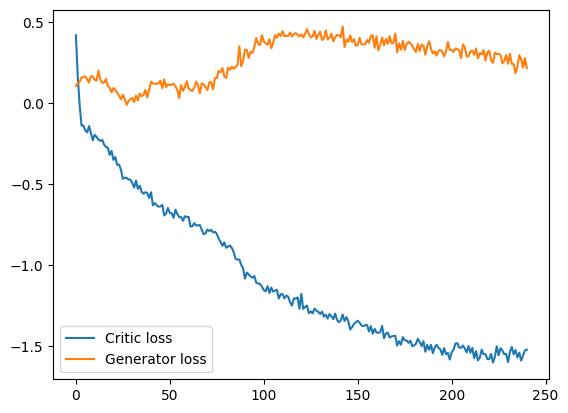

iteration: 251      critic: -1.600619      gen 0.254178
iteration: 261      critic: -1.531060      gen 0.257913
iteration: 271      critic: -1.483022      gen 0.140393
iteration: 281      critic: -1.455159      gen 0.167719
iteration: 291      critic: -1.452889      gen 0.132640
1
samples:[[ 7  5  7  6  5 16 18 17  6  7  6  6 16  4 14  5]
 [18 12  3  6  0  7  2  6  6 15  7  3  7 12  5  7]]
roc: 0.5000   avp: 0.5000   eo: 0.3333
Took 2.041671168804169 minutes so far..
iteration: 301      critic: -1.502358      gen 0.176883
iteration: 311      critic: -1.482240      gen 0.128634
iteration: 321      critic: -1.477469      gen 0.119442
iteration: 331      critic: -1.486172      gen -0.002304
iteration: 341      critic: -1.505392      gen 0.171026
iteration: 351      critic: -1.483709      gen 0.069264
iteration: 361      critic: -1.436061      gen 0.120740
iteration: 371      critic: -1.413270      gen 0.072344
iteration: 381      critic: -1.477934      gen 0.056580
iteration: 391      cri

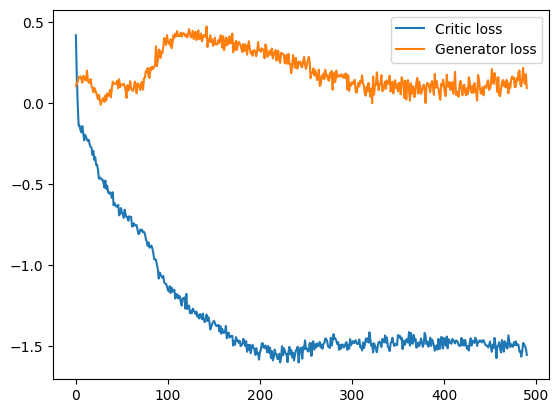

iteration: 501      critic: -1.510925      gen 0.102468
iteration: 511      critic: -1.490582      gen 0.111534
iteration: 521      critic: -1.530962      gen 0.123494
iteration: 531      critic: -1.547658      gen 0.109411
iteration: 541      critic: -1.492110      gen 0.149498
iteration: 551      critic: -1.531648      gen 0.213188
iteration: 561      critic: -1.582872      gen 0.202360
iteration: 571      critic: -1.582258      gen 0.143748
iteration: 581      critic: -1.468418      gen 0.215008
iteration: 591      critic: -1.548685      gen 0.215394
1
samples:[[ 5  3 16 19  7 12 18 17 19  7  6  6 18  7  7  7]
 [ 7  6  7 16  6  2  0  0  6  7  7  7  7  6 12 18]]
roc: 0.5000   avp: 0.5000   eo: 0.1905
Took 4.185195068518321 minutes so far..
iteration: 601      critic: -1.544249      gen 0.146826
iteration: 611      critic: -1.567042      gen 0.119754
iteration: 621      critic: -1.550818      gen 0.217229
iteration: 631      critic: -1.540053      gen 0.147602
iteration: 641      crit

In [46]:
trainer.train(create_graph_every=100, plot_graph_every=250, num_samples_graph=1010, stopping_criterion='val')

### You Wouldn't Believe this but NetGAN Actually Works

time to filter out all molecules which are their own MST so NetGAN doesn't crash

In [86]:
def molecule_is_own_MST(graph):
    graph = nx.to_numpy_array(graph)
    graph[graph!=0] = 1.0
    graph_nx = nx.from_numpy_array(graph)
    graph_sparse = scipy.sparse.csr_matrix(graph)
    n = int(graph.sum())
    not_graph_sparse = scipy.sparse.tril(graph_sparse).tocsr()
    mst = scipy.sparse.csgraph.minimum_spanning_tree(not_graph_sparse)
    mst[mst > 1] = 1
    mst.eliminate_zeros()
    ihatethis = not_graph_sparse - mst
    ihatethis = ihatethis.asformat("array")
    none = np.array([[0. for j in range(n)] for i in range(n)])
    return ihatethis != none
    

In [54]:
meth, _ = pyg_to_ssm(0)

('x', tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))
('edge_index', tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]]))
('edge_attr', tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]))
('y', tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]]))
('pos', tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,

/var/folders/60/yjm0dhb14rx345qp3gt455mw0000gn/T/ipykernel_8553/3298640954.py:4: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  sample_mat = nx.to_scipy_sparse_matrix(sample)


In [85]:
prims

True